# ons/lfs hours worked vs length of (internet) working day

* note: unfortunately ons round hours worked to 1 decimal point (6 minutes)
* can not find good relationship

In [1]:
hwm.sa <- read.csv("../../data/econ/average_actual_weekly_hours_of_work_for_full-time_workers_seasonally_adjusted_monthly.csv", header=F, stringsAsFactors=F)
hwm.sa$month <- rep(1:12, 20)
tail(hwm.sa)

,V1,V2,month
235,2018 JUL,37.3,7
236,2018 AUG,37.3,8
237,2018 SEP,37.3,9
238,2018 OCT,37.1,10
239,2018 NOV,37.1,11
240,2018 DEC,37.2,12


does not appear to be seasonal pattern

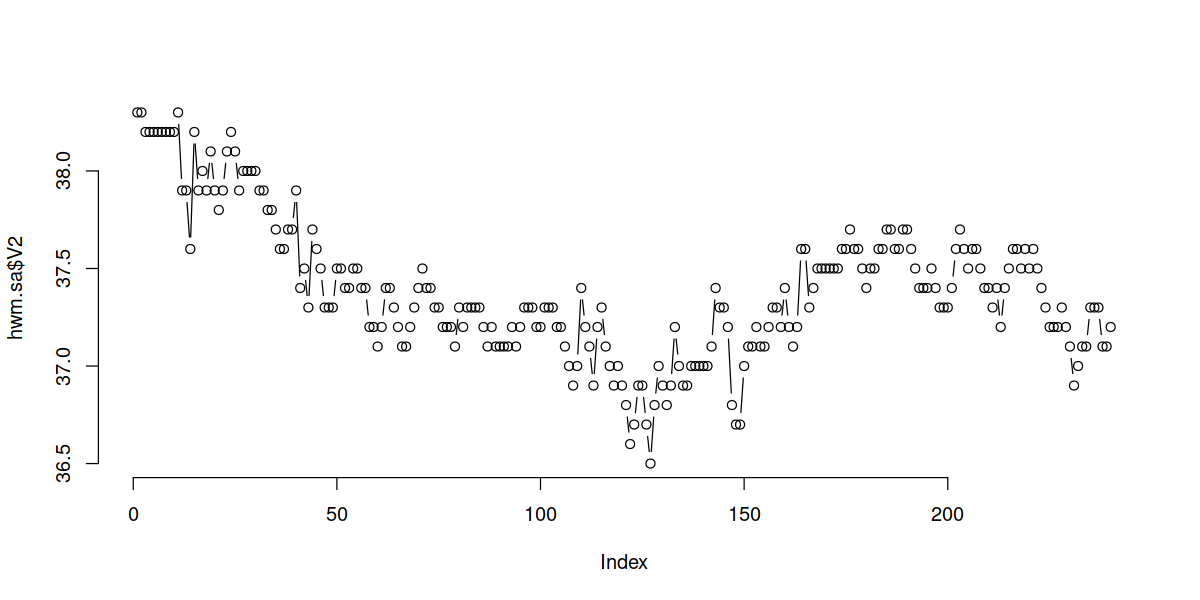

In [2]:
# sa lfs working hours
options(repr.plot.width=10, repr.plot.height=5)
plot(hwm.sa$V2, type="b", bty="n")

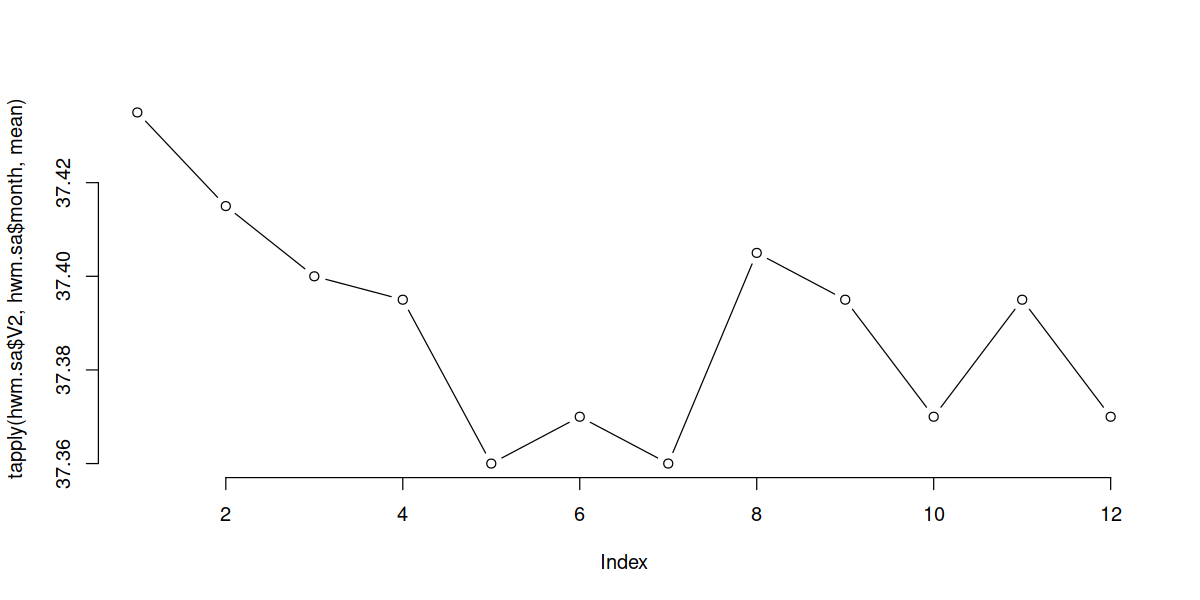

In [3]:
plot(tapply(hwm.sa$V2, hwm.sa$month, mean), type="b", bty="n")

In [4]:
hw.ind.nsa <- read.csv("../../data/econ/industry_nsa_Q_1999-2018.csv", header=T, stringsAsFactors=F)
hw.ind.nsa$mew <- rowMeans(hw.ind.nsa)
hw.ind.nsa$q <- rep(1:4, 20)
tail(hw.ind.nsa)

,information_commuication,financial,proffesional_technical,admin_support,mew,q
75,35.2,33.3,32.6,31.2,33.075,3
76,34.5,32.9,32.6,30.3,32.575,4
77,35.9,33.8,34.0,30.8,33.625,1
78,36.2,34.2,34.2,31.9,34.125,2
79,34.9,34.2,33.5,31.7,33.575,3
80,34.7,33.4,33.2,30.7,33.000,4


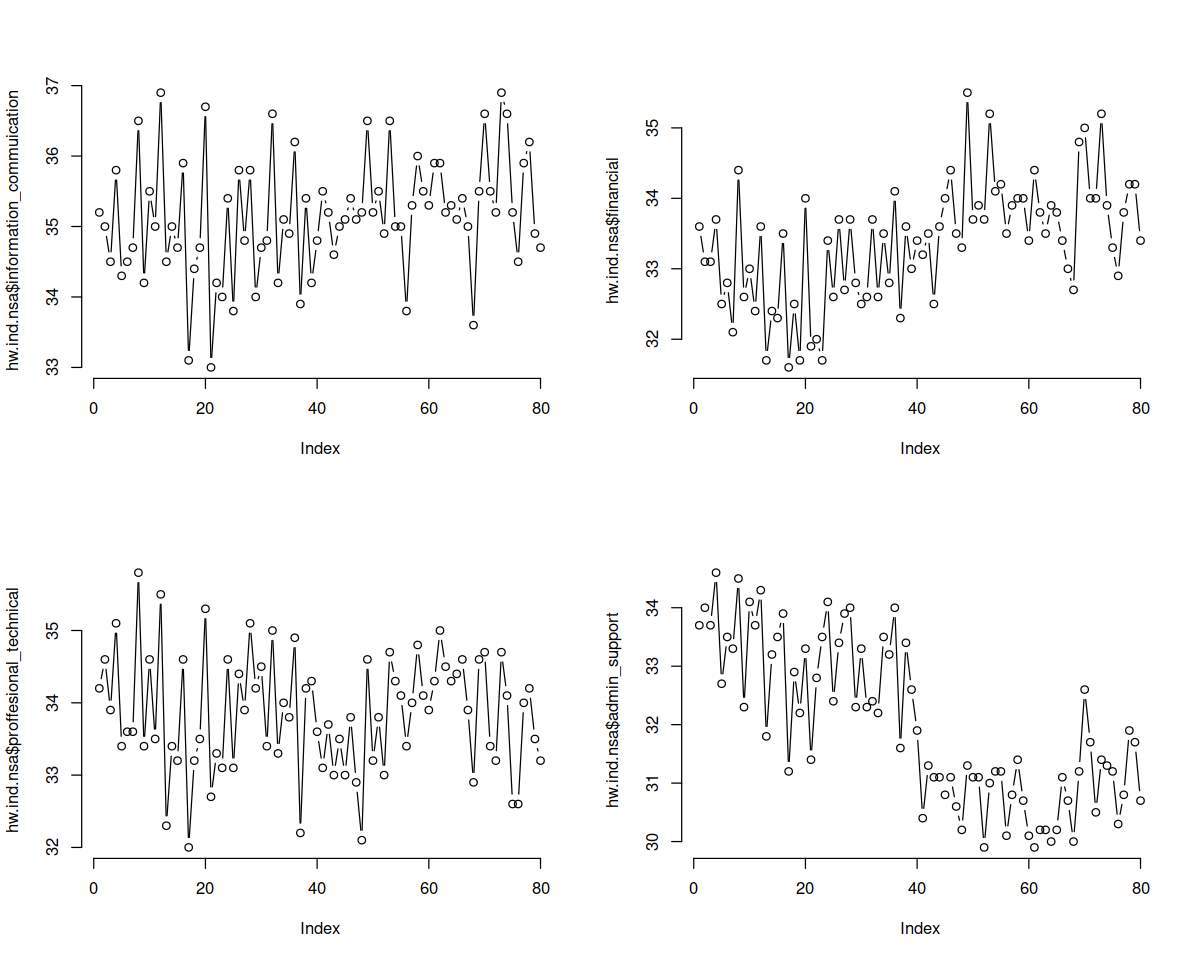

In [5]:
# parts of the (nsa) working hours
options(repr.plot.width=10, repr.plot.height=8)
par(mfrow=c(2, 2), bty="n")
plot(hw.ind.nsa$information_commuication, type="b")
plot(hw.ind.nsa$financial, type="b")
plot(hw.ind.nsa$proffesional_technical, type="b")
plot(hw.ind.nsa$admin_support, type="b")

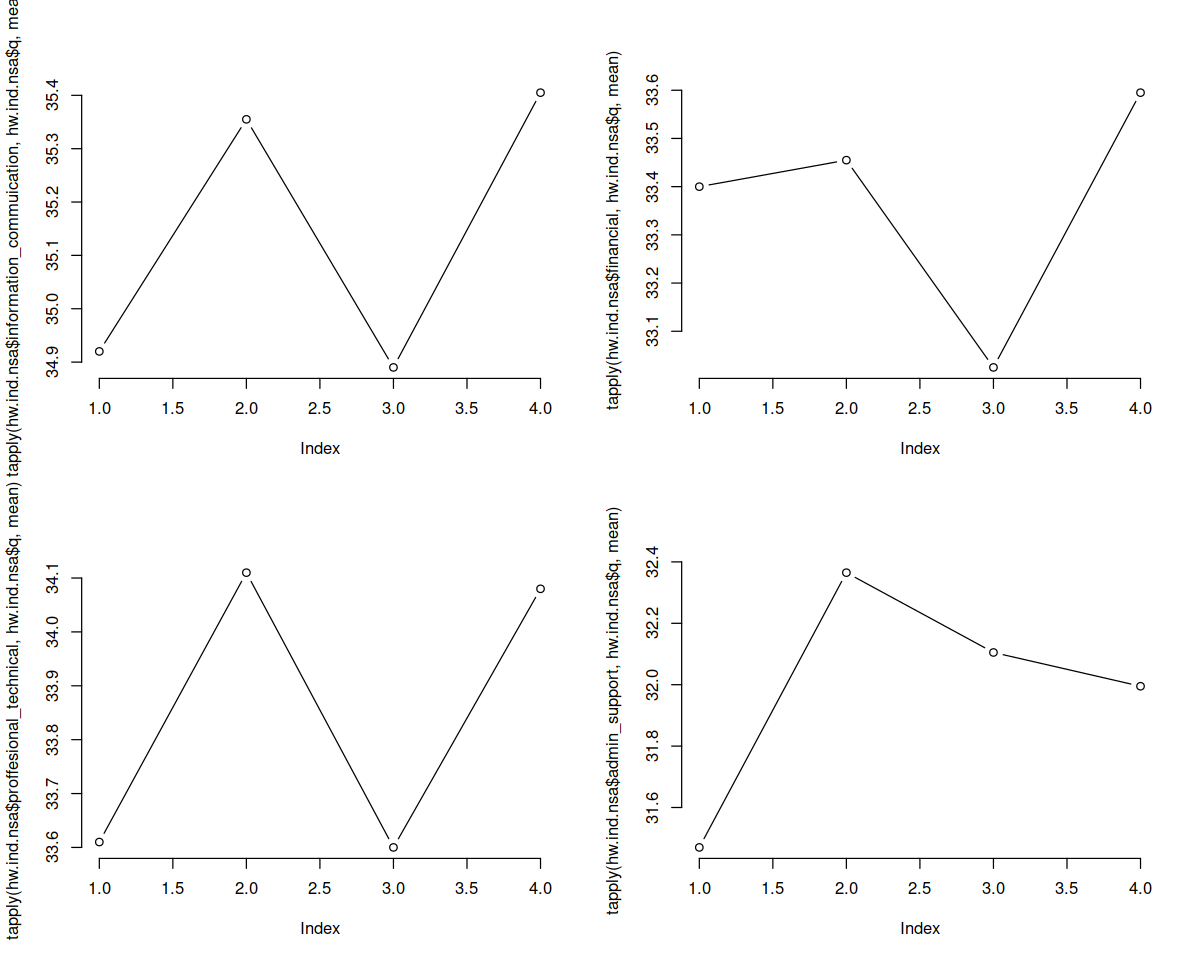

In [6]:
par(mfrow=c(2, 2), bty="n")
plot(tapply(hw.ind.nsa$information_commuication, hw.ind.nsa$q, mean), type="b")
plot(tapply(hw.ind.nsa$financial, hw.ind.nsa$q, mean), type="b")
plot(tapply(hw.ind.nsa$proffesional_technical, hw.ind.nsa$q, mean), type="b")
plot(tapply(hw.ind.nsa$admin_support, hw.ind.nsa$q, mean), type="b")

In [7]:
internet <- read.csv("../../traffic_comp/bandwidth_features_london.csv", stringsAsFactors=F)
internet$X <- as.Date(internet$X)
internet$month <- months(internet$X)
internet$day <- weekdays(internet$X)
head(internet)

X,raw.changepoint1,raw.changepoint2,raw.changepoint3,raw.changepoint4,raw.value1,raw.value2,raw.value3,raw.value4,raw.Min.,⋯,mean.commute.abs.diff,work.commute.res.diff,work.day.len,day.len,les.time.len,work.com.low.len,work.day.width,commute.depth,month,day
2016-01-01,70,NA,NA,250,142094581805,NA,NA,449523344203,141638139757,⋯,2412067212,74059559796,NA,182,NA,NA,NA,NA,January,Friday
2016-01-02,67,199,210,233,148035334122,443893943836,435825414109,461636251086,147168408380,⋯,1994113747,57007019436,132,166,34,11,295858609714,16939683352,January,Saturday
2016-01-03,69,NA,NA,241,154515455881,NA,NA,483353078032,153615775620,⋯,2755421693,41957378621,NA,172,NA,NA,NA,NA,January,Sunday
2016-01-04,58,197,216,249,148035131315,464677045201,452847569505,487948966186,148035131315,⋯,3225606776,-4765645316,139,191,52,19,316641913886,23465436188,January,Monday
2016-01-05,56,202,222,249,159042717644,482618200642,463088495768,499520218623,156657135298,⋯,2661918882,22571931452,145,193,48,22,323575482998,27980713864,January,Tuesday
2016-01-06,55,202,218,249,155683624698,475163929776,470021276110,495608913792,149765122060,⋯,2989170675,22057871060,147,194,47,16,319480305078,15365145674,January,Wednesday


In [8]:
colnames(internet)

[1] "X"                       "raw.changepoint1"       
  [3] "raw.changepoint2"        "raw.changepoint3"       
  [5] "raw.changepoint4"        "raw.value1"             
  [7] "raw.value2"              "raw.value3"             
  [9] "raw.value4"              "raw.Min."               
 [11] "raw.1st.Qu."             "raw.Median"             
 [13] "raw.Mean"                "raw.3rd.Qu."            
 [15] "raw.Max."                "raw.sd"                 
 [17] "raw.skewness"            "raw.kurtosis"           
 [19] "raw.evcom.Min."          "raw.evcom.1st.Qu."      
 [21] "raw.evcom.Median"        "raw.evcom.Mean"         
 [23] "raw.evcom.3rd.Qu."       "raw.evcom.Max."         
 [25] "raw.evcom.sd"            "raw.evcom.skewness"     
 [27] "raw.evcom.kurtosis"      "raw.evcom.diff.Min."    
 [29] "raw.evcom.diff.1st.Qu."  "raw.evcom.diff.Median"  
 [31] "raw.evcom.diff.Mean"     "raw.evcom.diff.3rd.Qu." 
 [33] "raw.evcom.diff.Max."     "raw.evcom.diff.sd"      
 [35] "raw.evcom.diff.skewness" "raw.evcom.diff.kurtosis"
 [37] "sa1.changepoint1"        "sa1.changepoint2"       
 [39] "sa1.changepoint3"        "sa1.changepoint4"       
 [41] "sa1.value1"              "sa1.value2"             
 [43] "sa1.value3"              "sa1.value4"             
 [45] "sa1.Min."                "sa1.1st.Qu."            
 [47] "sa1.Median"              "sa1.Mean"               
 [49] "sa1.3rd.Qu."             "sa1.Max."               
 [51] "sa1.sd"                  "sa1.skewness"           
 [53] "sa1.kurtosis"            "sa1.evcom.Min."         
 [55] "sa1.evcom.1st.Qu."       "sa1.evcom.Median"       
 [57] "sa1.evcom.Mean"          "sa1.evcom.3rd.Qu."      
 [59] "sa1.evcom.Max."          "sa1.evcom.sd"           
 [61] "sa1.evcom.skewness"      "sa1.evcom.kurtosis"     
 [63] "sa1.evcom.diff.Min."     "sa1.evcom.diff.1st.Qu." 
 [65] "sa1.evcom.diff.Median"   "sa1.evcom.diff.Mean"    
 [67] "sa1.evcom.diff.3rd.Qu."  "sa1.evcom.diff.Max."    
 [69] "sa1.evcom.diff.sd"       "sa1.evcom.diff.skewness"
 [71] "sa1.evcom.diff.kurtosis" "sa2.changepoint1"       
 [73] "sa2.changepoint2"        "sa2.changepoint3"       
 [75] "sa2.changepoint4"        "sa2.value1"             
 [77] "sa2.value2"              "sa2.value3"             
 [79] "sa2.value4"              "sa2.Min."               
 [81] "sa2.1st.Qu."             "sa2.Median"             
 [83] "sa2.Mean"                "sa2.3rd.Qu."            
 [85] "sa2.Max."                "sa2.sd"                 
 [87] "sa2.skewness"            "sa2.kurtosis"           
 [89] "sa2.evcom.Min."          "sa2.evcom.1st.Qu."      
 [91] "sa2.evcom.Median"        "sa2.evcom.Mean"         
 [93] "sa2.evcom.3rd.Qu."       "sa2.evcom.Max."         
 [95] "sa2.evcom.sd"            "sa2.evcom.skewness"     
 [97] "sa2.evcom.kurtosis"      "sa2.evcom.diff.Min."    
 [99] "sa2.evcom.diff.1st.Qu."  "sa2.evcom.diff.Median"  
[101] "sa2.evcom.diff.Mean"     "sa2.evcom.diff.3rd.Qu." 
[103] "sa2.evcom.diff.Max."     "sa2.evcom.diff.sd"      
[105] "sa2.evcom.diff.skewness" "sa2.evcom.diff.kurtosis"
[107] "res.Min."                "res.1st.Qu."            
[109] "res.Median"              "res.Mean"               
[111] "res.3rd.Qu."             "res.Max."               
[113] "res.sd"                  "res.skewness"           
[115] "res.kurtosis"            "res.evcom.Min."         
[117] "res.evcom.1st.Qu."       "res.evcom.Median"       
[119] "res.evcom.Mean"          "res.evcom.3rd.Qu."      
[121] "res.evcom.Max."          "res.evcom.sd"           
[123] "res.evcom.skewness"      "res.evcom.kurtosis"     
[125] "mean.work"               "mean.work.res"          
[127] "mean.fixed.work.raw"     "mean.fixed.work.sa1"    
[129] "mean.fixed.work.sa2"     "mean.fixed.work.sa3"    
[131] "mean.fixed.work.sa4"     "mean.commute.res"       
[133] "mean.commute.abs.diff"   "work.commute.res.diff"  
[135] "work.day.len"            "day.len"                
[137] "les.time.len"            "work.com.low.len"       


In [9]:
is_weekday <- function(x) !(x == "Saturday" | x == "Sunday")

In [10]:
x <- internet[is_weekday(internet$day), ]

work.day.length <- with(x, 5 * (sa1.changepoint2 - sa1.changepoint1)) # work (has +pv with Q data)
#work.day.length <- with(x, 5 * (changepoint4 - changepoint2)) # lesuire time (has -nv with Q data)

#work.day.length <- with(x, 5 * (changepoint2 - 109)) # 109 = 9am

work.day.length <- data.frame(date=x$X, year=as.numeric(strftime(x$X, "%Y")), month=as.numeric(strftime(x$X, "%m")), day=as.numeric(strftime(x$X, "%w")), length=work.day.length)

In [11]:
tail(work.day.length)

,date,year,month,day,length
777,2018-12-24,2018,12,1,NA
778,2018-12-25,2018,12,2,485
779,2018-12-26,2018,12,3,665
780,2018-12-27,2018,12,4,650
781,2018-12-28,2018,12,5,705
782,2018-12-31,2018,12,1,NA


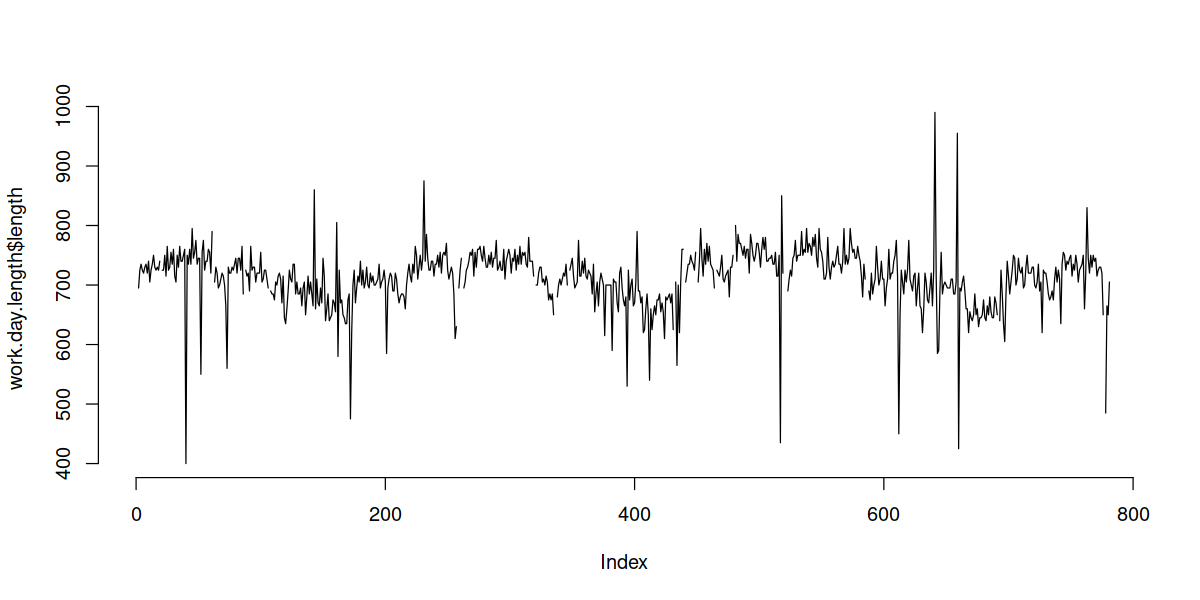

In [12]:
# internet working day length (3 years, working week only)
options(repr.plot.width=10, repr.plot.height=5)
plot(work.day.length$length, type="l", bty="n")

Loading required package: svd
Loading required package: forecast

Attaching package: ‘Rssa’

The following object is masked from ‘package:stats’:

    decompose



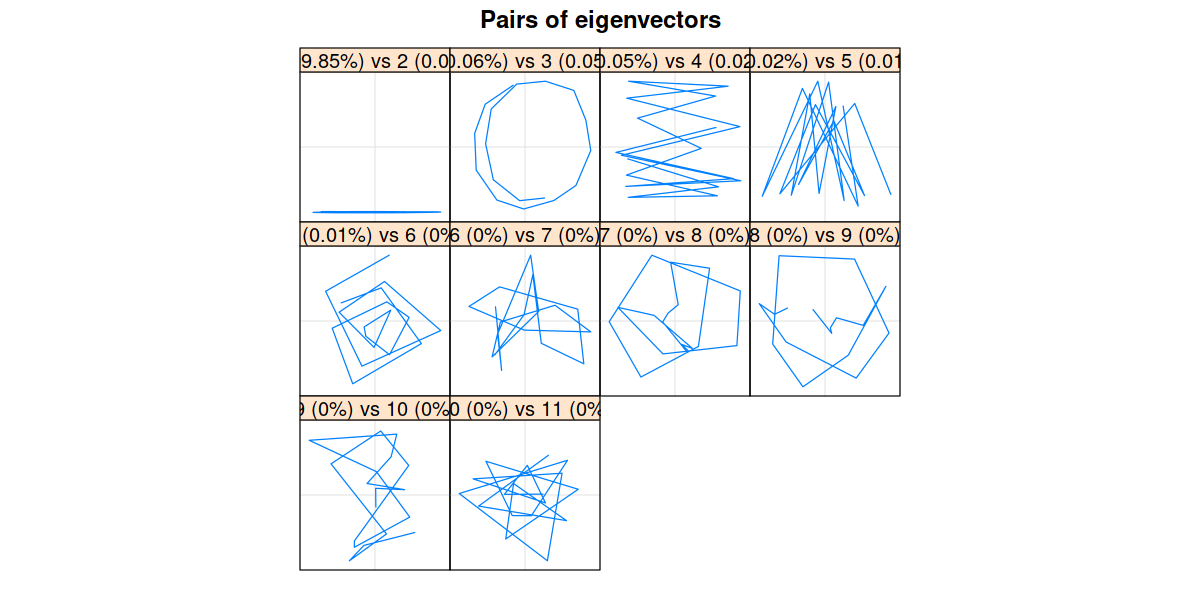

In [13]:
# make monthly nsa internet
library(Rssa)
my.orig <- as.vector(with(work.day.length, tapply(length, list(month, year), mean, na.rm=T)))
s <- ssa(my.orig)
plot(s, type="pair")

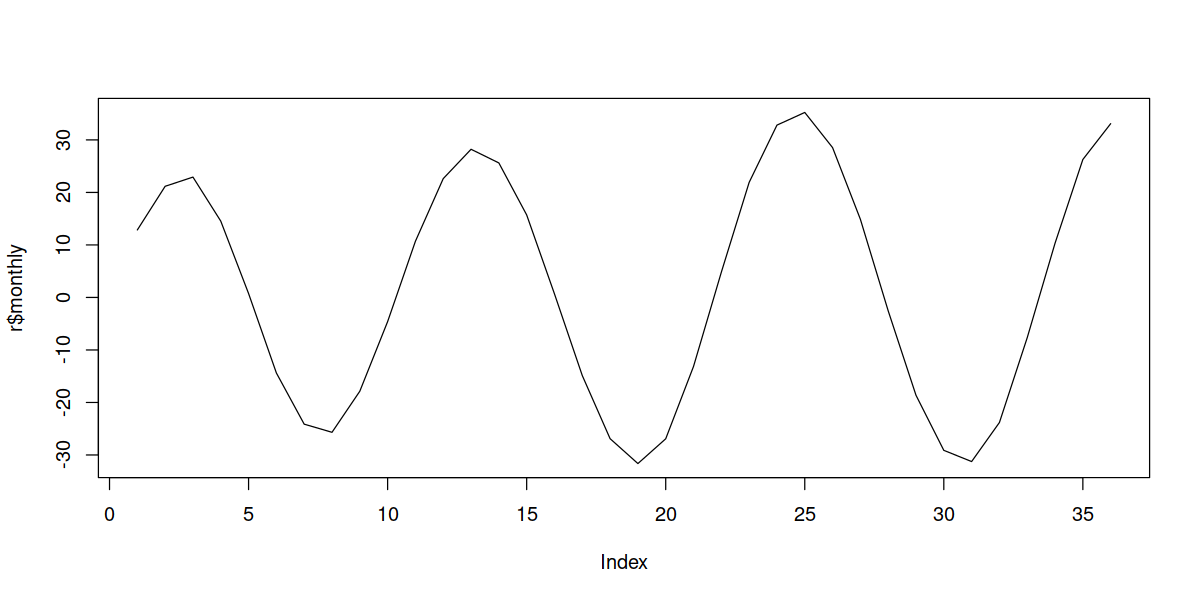

In [14]:
r <- reconstruct(s, groups=list(monthly=c(2,3)))
plot(r$monthly, type="l")

In [15]:
my.sa <- my.orig - r$monthly

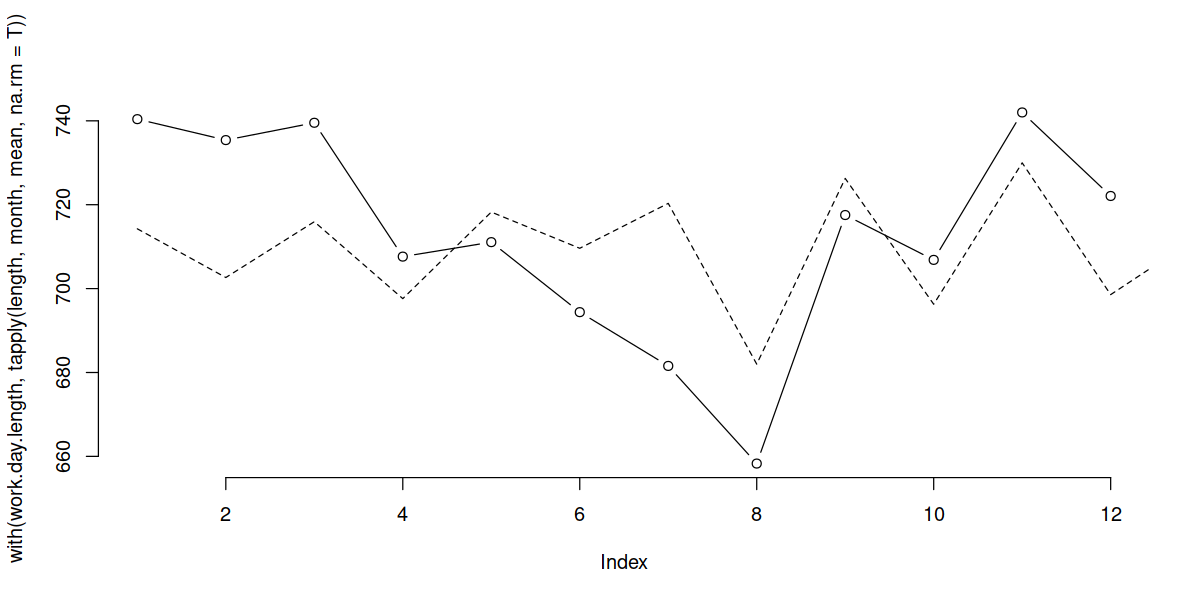

In [16]:
# internet nsa vs sa
plot(with(work.day.length, tapply(length, month, mean, na.rm=T)), type="b", bty="n")
lines(my.sa, lty=2)

In [17]:
mean(work.day.length$length, na.rm=T) * 5 / 60

[1] 59.39119

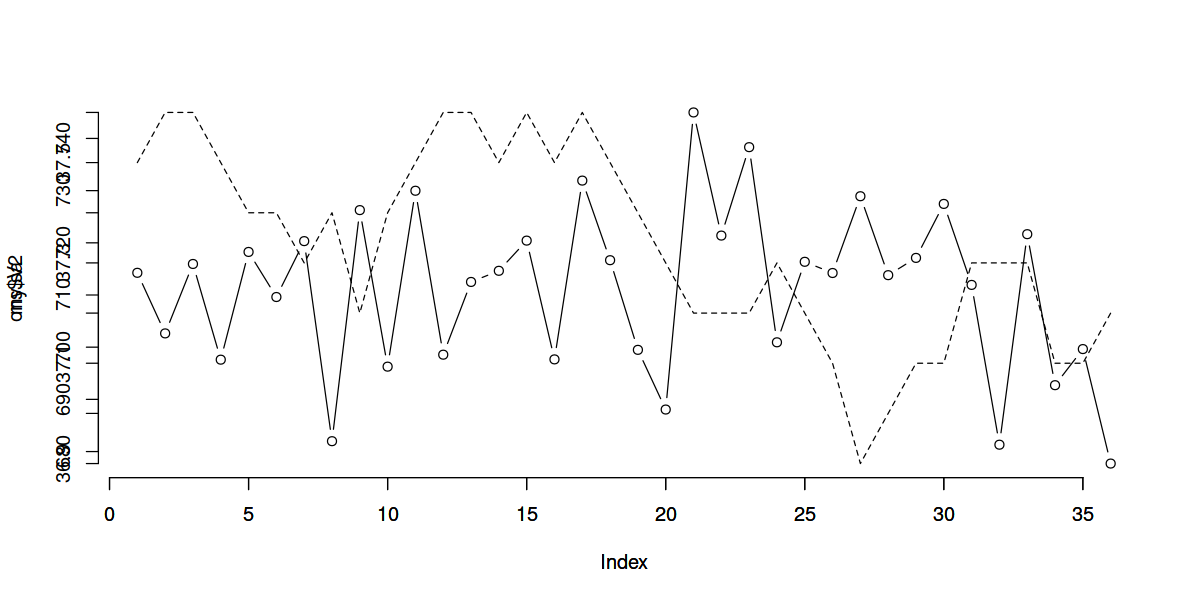

In [18]:
# looks promising - but too good to be true
ons <- tail(hwm.sa, 36)
plot(my.sa, type="b", lty=1, bty="n")
#plot(5 * as.vector(with(work.day.length, tapply(length, list(month, year), mean, na.rm=T))) / 60, type="b", bty="n")
par(new=T)
plot(ons$V2, type="l", lty=2, bty="n")
#par(new=T)
#plot(my.sa, type="l", lty=2, bty="n")
#plot(c(tail(ons$V2, -1), NA), type="l", lty=2, bty="n")
#lines(ons$V2, type="l", lty=2, bty="n")

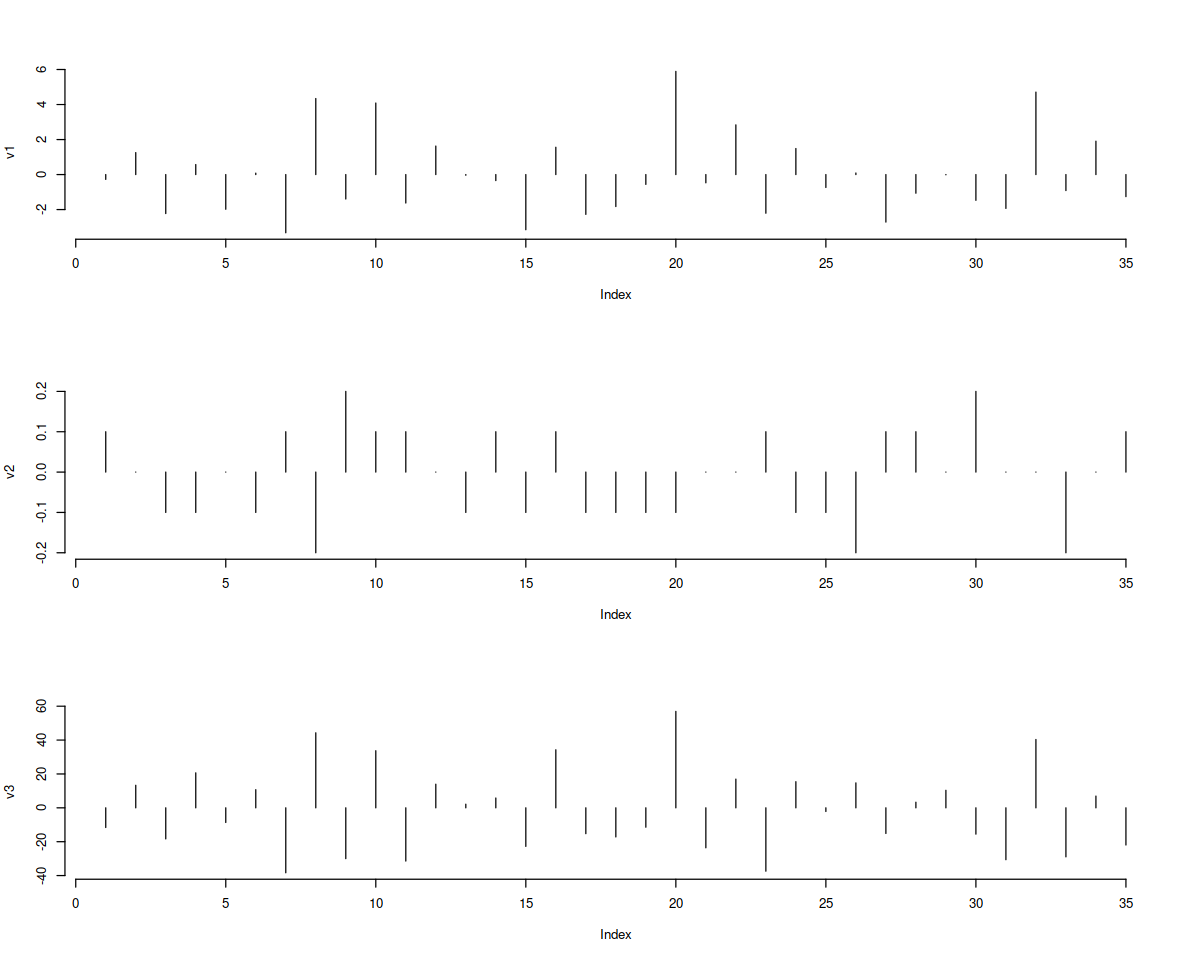

In [19]:
options(repr.plot.width=10, repr.plot.height=8)
v1 <- diff(5 * as.vector(with(work.day.length, tapply(length, list(month, year), mean, na.rm=T))) / 60)
v2 <- diff(ons$V2)
v3 <- diff(my.sa)
par(mfrow=c(3, 1), bty="n")
plot(v1, type="h")
plot(v2, type="h")
plot(v3, type="h")

In [20]:
# :(
# maybe because of seasonal adjustment of ons series?
cor.test(v1, v2)


	Pearson's product-moment correlation

data:  v1 and v2
t = -1.1856, df = 33, p-value = 0.2442
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5015907  0.1405853
sample estimates:
      cor 
-0.202131 


In [21]:
# higher cor on sa data - although -nv
cor.test(v2, v3)


	Pearson's product-moment correlation

data:  v2 and v3
t = -1.6367, df = 33, p-value = 0.1112
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.55644013  0.06519743
sample estimates:
       cor 
-0.2740023 


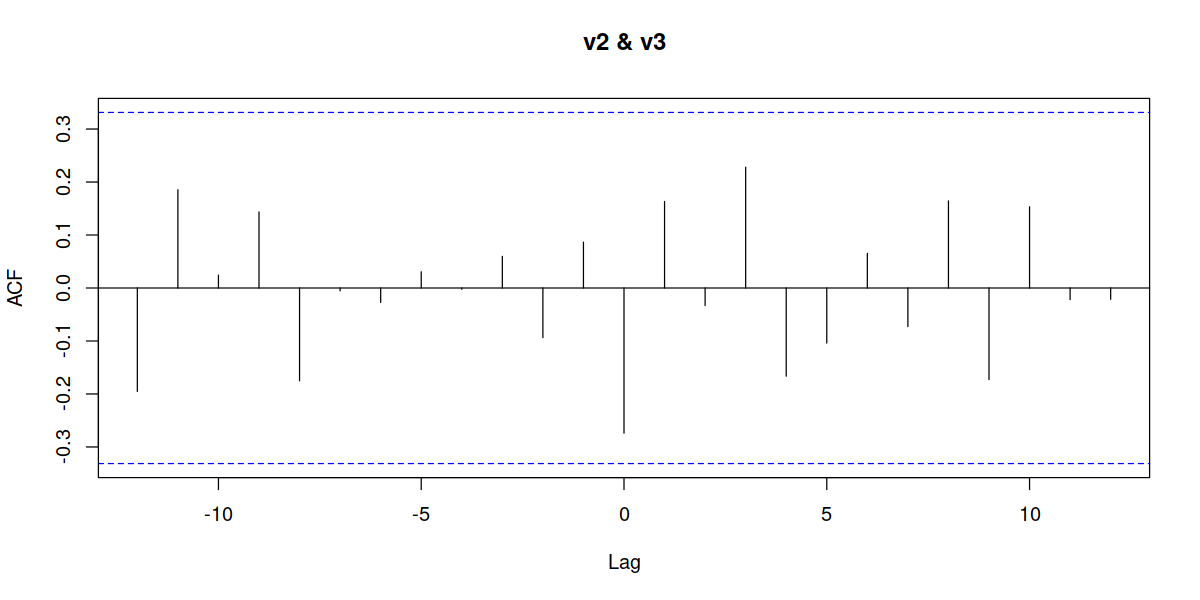

In [22]:
# lags dont help either..
options(repr.plot.width=10, repr.plot.height=5)
ccf(v2, v3)

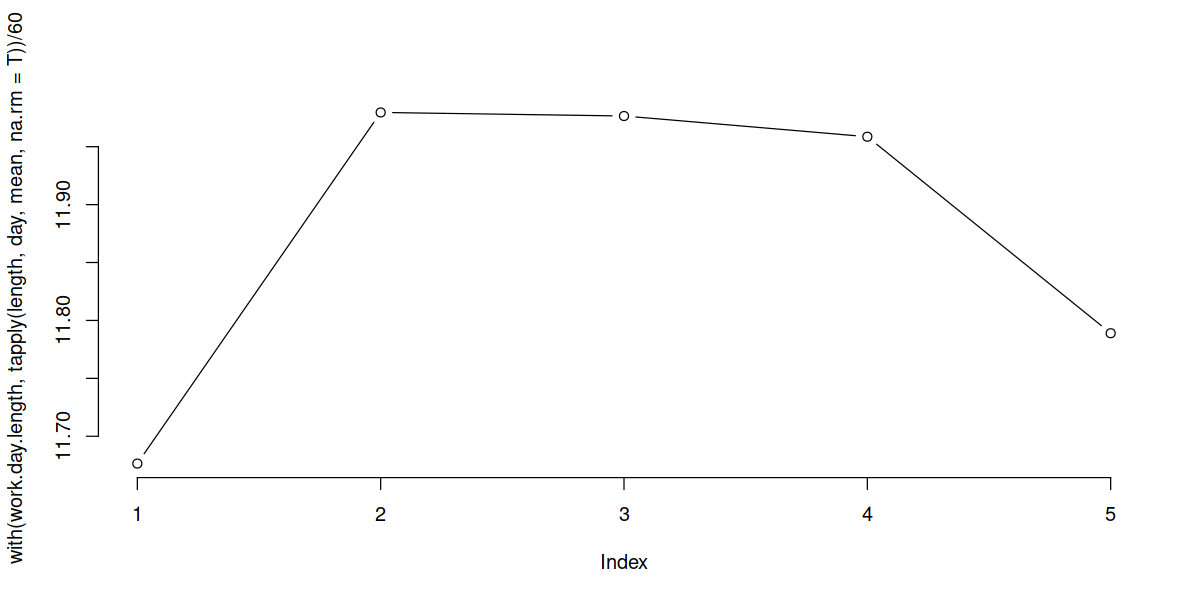

In [23]:
# internet weekday seasonality (tuesdays = longest day)
plot(with(work.day.length, tapply(length, day, mean, na.rm=T)) / 60, type="b", bty="n")

In [24]:
my.monthly <- data.frame(year=rep(2016:2018, each=12), month=1:12, q=rep(1:4, each=3), length=5 * as.vector(with(work.day.length, tapply(length, list(month, year), mean, na.rm=T))) / 60)
head(my.monthly, 13)

year,month,q,length
2016,1,1,60.59211
2016,2,1,60.31746
2016,3,1,61.57197
2016,4,2,59.34524
2016,5,2,59.91667
2016,6,2,57.93561
2016,7,3,58.01587
2016,8,3,54.69203
2016,9,3,59.03409
2016,10,4,57.63889


In [25]:
my.q <- as.vector(with(my.monthly, tapply(length, list(q, year), mean)))

In [26]:
ons.q <- tail(hw.ind.nsa, 12)
ons.q

,information_commuication,financial,proffesional_technical,admin_support,mew,q
69,35.5,34.8,34.6,31.2,34.025,1
70,36.6,35.0,34.7,32.6,34.725,2
71,35.5,34.0,33.4,31.7,33.650,3
72,35.2,34.0,33.2,30.5,33.225,4
73,36.9,35.2,34.7,31.4,34.550,1
74,36.6,33.9,34.1,31.3,33.975,2
75,35.2,33.3,32.6,31.2,33.075,3
76,34.5,32.9,32.6,30.3,32.575,4
77,35.9,33.8,34.0,30.8,33.625,1
78,36.2,34.2,34.2,31.9,34.125,2


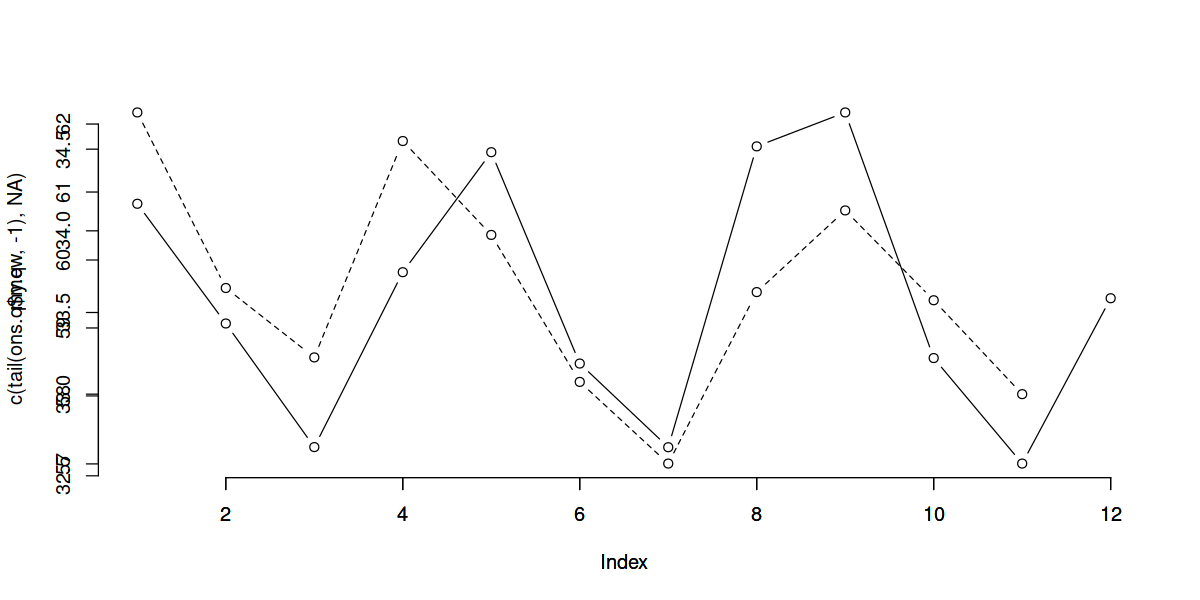

In [27]:
plot(my.q, type="b", bty="n")
par(new=T)
#plot(ons.q$mew, type="b", lty=2, bty="n")
##
## Average hours worked by industry. This table is updated four times a year in:
# February, May, August and November.
# These estimates are sourced from the Labour Force Survey, a survey of households
# ^-- probably explains the lag.
plot(c(tail(ons.q$mew, -1), NA), type="b", lty=2, bty="n")

In [28]:
cor.test(diff(ons.q$mew), diff(my.q))


	Pearson's product-moment correlation

data:  diff(ons.q$mew) and diff(my.q)
t = 0.096119, df = 9, p-value = 0.9255
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5789738  0.6199883
sample estimates:
       cor 
0.03202322 


In [29]:
# if we lag the ons series by -1, strong cor. however note this is on nsa data.
cor.test(diff(c(tail(ons.q$mew, -1), NA)), diff(my.q))


	Pearson's product-moment correlation

data:  diff(c(tail(ons.q$mew, -1), NA)) and diff(my.q)
t = 3.8044, df = 8, p-value = 0.005204
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3494544 0.9514072
sample estimates:
      cor 
0.8025083 


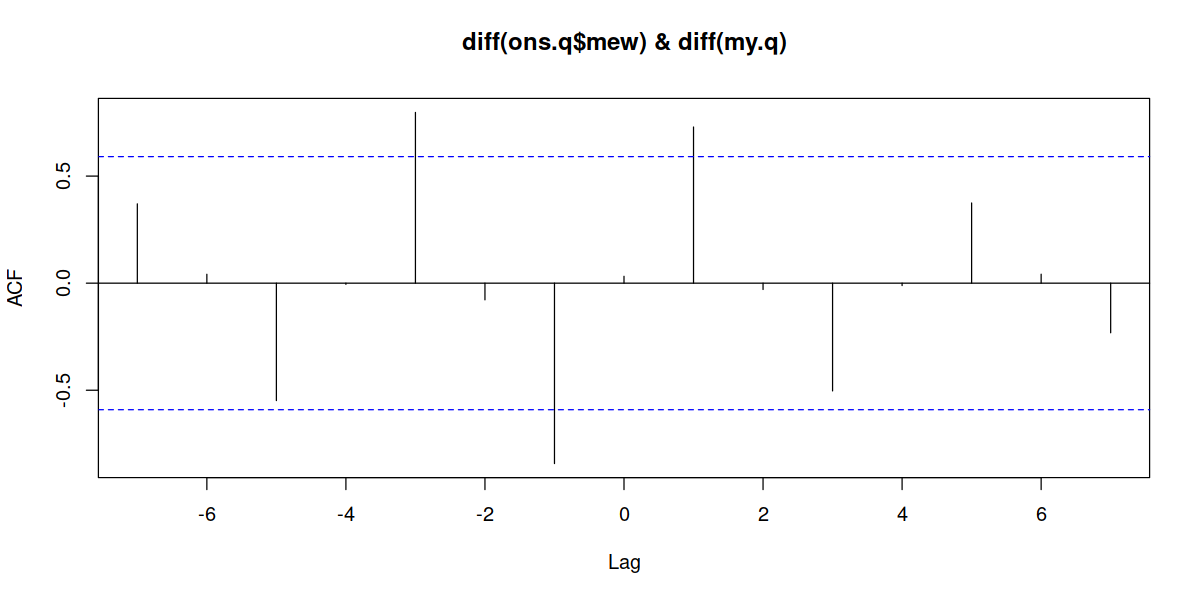

In [30]:
# however there are significant cors at other lags too.
ccf(diff(ons.q$mew), diff(my.q))

look at fixed 10am - 2pm bandwidth

In [31]:
work.bw <- data.frame(date=x$X, year=as.numeric(strftime(x$X, "%Y")), month=as.numeric(strftime(x$X, "%m")), day=as.numeric(strftime(x$X, "%w")), x[, c('mean.fixed.work.raw', 'mean.fixed.work.sa1', 'mean.fixed.work.sa2', 'mean.fixed.work.sa3', 'mean.fixed.work.sa4')])
head(work.bw)

,date,year,month,day,mean.fixed.work.raw,mean.fixed.work.sa1,mean.fixed.work.sa2,mean.fixed.work.sa3,mean.fixed.work.sa4
1,2016-01-01,2016,1,5,334558172345,20280749168,15902758090,342171711369,337793720291
4,2016-01-04,2016,1,1,430818563573,113179256938,108654266053,435090132139,430565141254
5,2016-01-05,2016,1,2,426840838905,94372368893,104328749433,416276020245,426232400785
6,2016-01-06,2016,1,3,427741524322,88256256447,104830221677,410143741274,426717706504
7,2016-01-07,2016,1,4,411200682545,77098248866,87598364402,398965478847,409465594383
8,2016-01-08,2016,1,5,407842636467,86950959105,83338264409,408785642113,405172947416


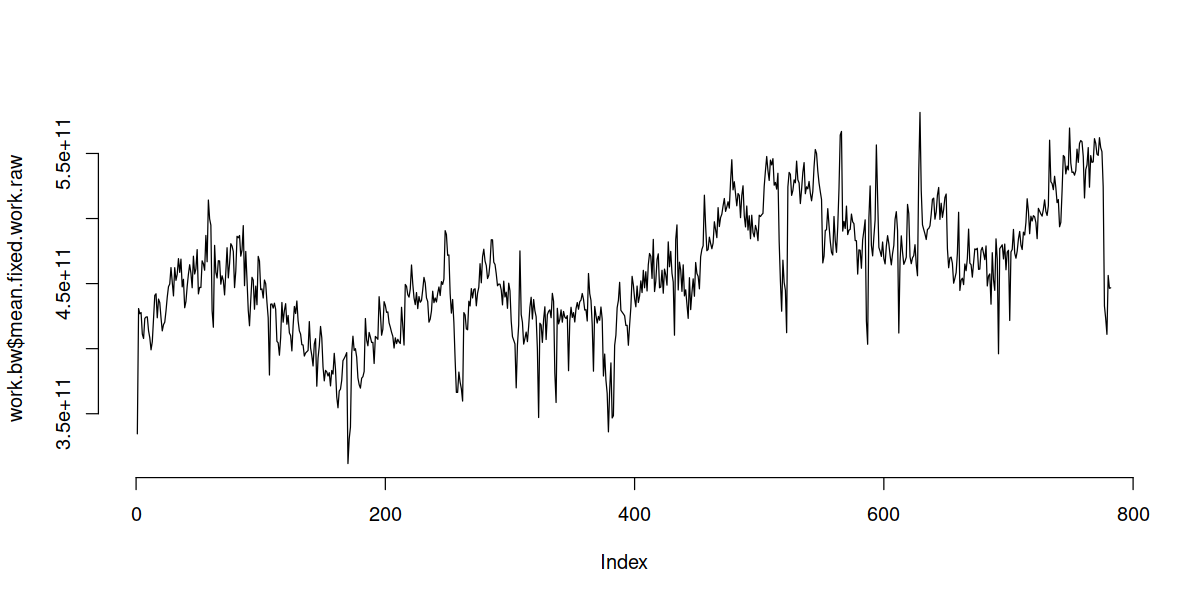

In [32]:
plot(work.bw$mean.fixed.work.raw, type="l", bty="n")

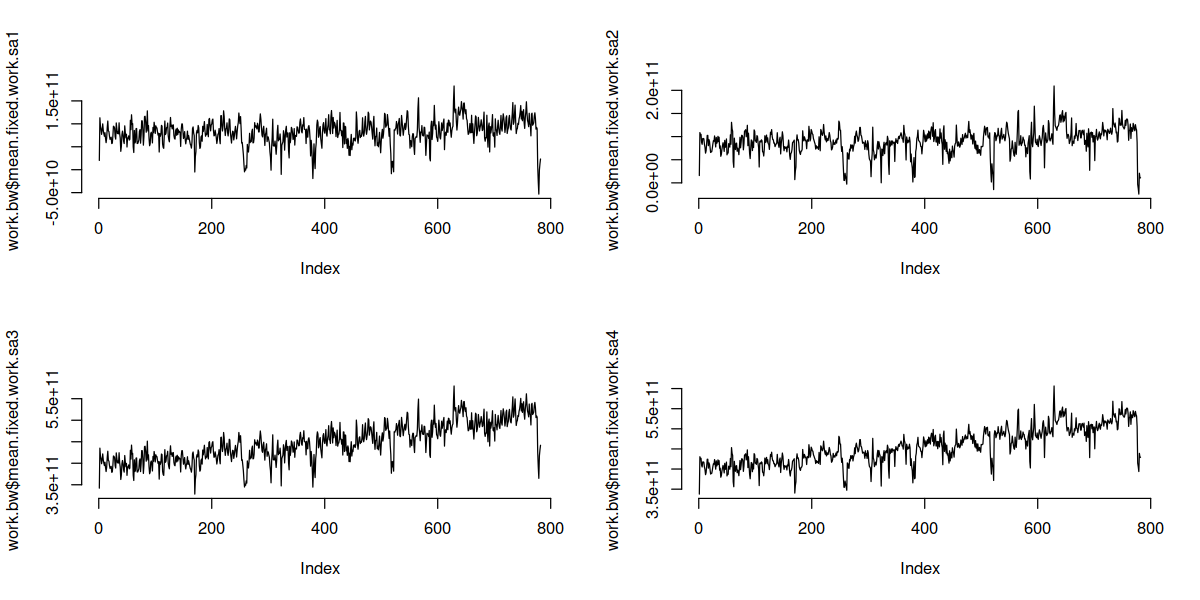

In [33]:
#    fixed.work.raw <- day$bw
#    fixed.work.sa1 <- day$bw - day$trend - day$winter_summer - day$inter_week_midweek_peak
#    fixed.work.sa2 <- day$bw - day$trend - day$winter_summer
#    fixed.work.sa3 <- day$bw - day$winter_summer - day$inter_week_midweek_peak
#    fixed.work.sa4 <- day$bw - day$winter_summer
par(mfrow=c(2,2), bty="n")
plot(work.bw$mean.fixed.work.sa1, type="l")
plot(work.bw$mean.fixed.work.sa2, type="l")
plot(work.bw$mean.fixed.work.sa3, type="l")
plot(work.bw$mean.fixed.work.sa4, type="l")

In [34]:
#my.monthly.bw <- data.frame(year=rep(2016:2018, each=12), month=1:12, q=rep(1:4, each=3), bw=as.vector(with(work.bw, tapply(mean.fixed.work.raw, list(month, year), mean, na.rm=T))))
my.monthly.bw <- data.frame(year=rep(2016:2018, each=12), month=1:12, q=rep(1:4, each=3), bw=as.vector(with(work.bw, tapply(mean.fixed.work.sa1, list(month, year), mean, na.rm=T))))
#my.monthly.bw <- data.frame(year=rep(2016:2018, each=12), month=1:12, q=rep(1:4, each=3), bw=as.vector(with(work.bw, tapply(mean.fixed.work.sa2, list(month, year), mean, na.rm=T))))
#my.monthly.bw <- data.frame(year=rep(2016:2018, each=12), month=1:12, q=rep(1:4, each=3), bw=as.vector(with(work.bw, tapply(mean.fixed.work.sa3, list(month, year), mean, na.rm=T))))
#my.monthly.bw <- data.frame(year=rep(2016:2018, each=12), month=1:12, q=rep(1:4, each=3), bw=as.vector(with(work.bw, tapply(mean.fixed.work.sa4, list(month, year), mean, na.rm=T))))

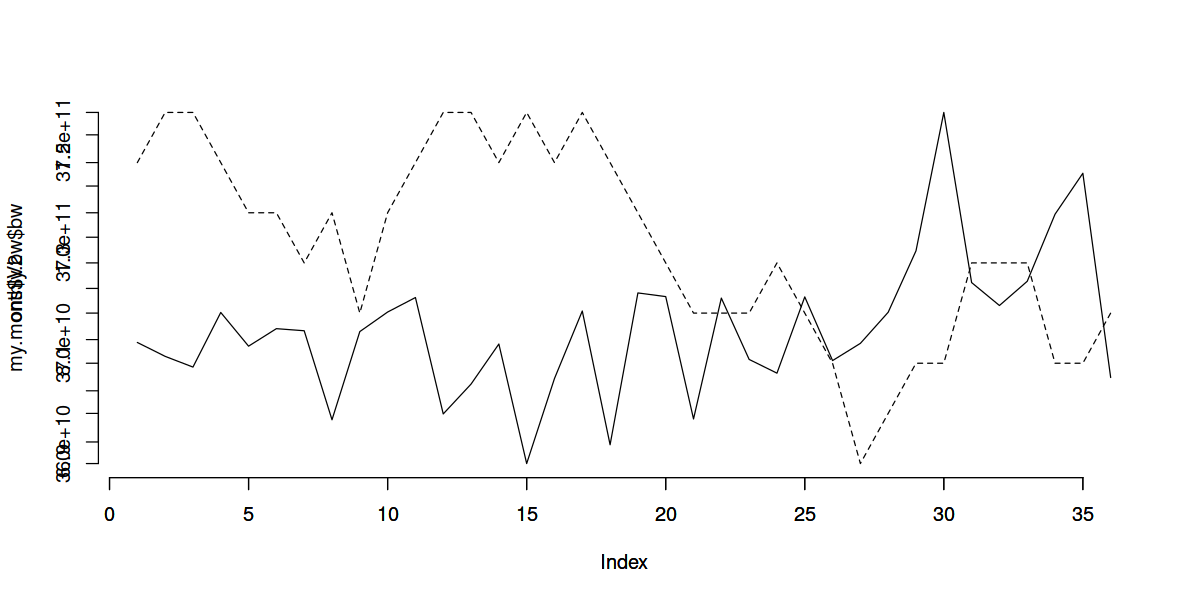

In [35]:
plot(my.monthly.bw$bw, type="l", bty="n")
par(new=T)
plot(ons$V2, type="l", bty="n", lty=2)

In [36]:
cor.test(diff(my.monthly.bw$bw), diff(ons$V2))


	Pearson's product-moment correlation

data:  diff(my.monthly.bw$bw) and diff(ons$V2)
t = -2.0677, df = 33, p-value = 0.04658
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.603772295 -0.006110391
sample estimates:
       cor 
-0.3386673 


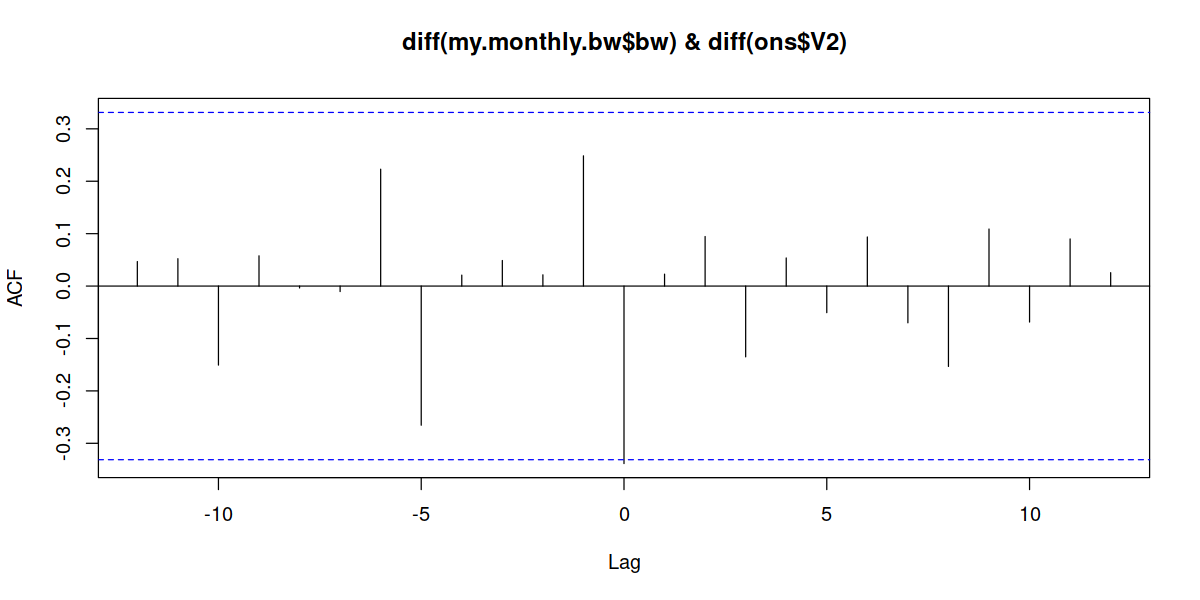

In [37]:
ccf(diff(my.monthly.bw$bw), diff(ons$V2))

In [38]:
my.q.bw <- as.vector(with(my.monthly.bw, tapply(bw, list(q, year), mean)))

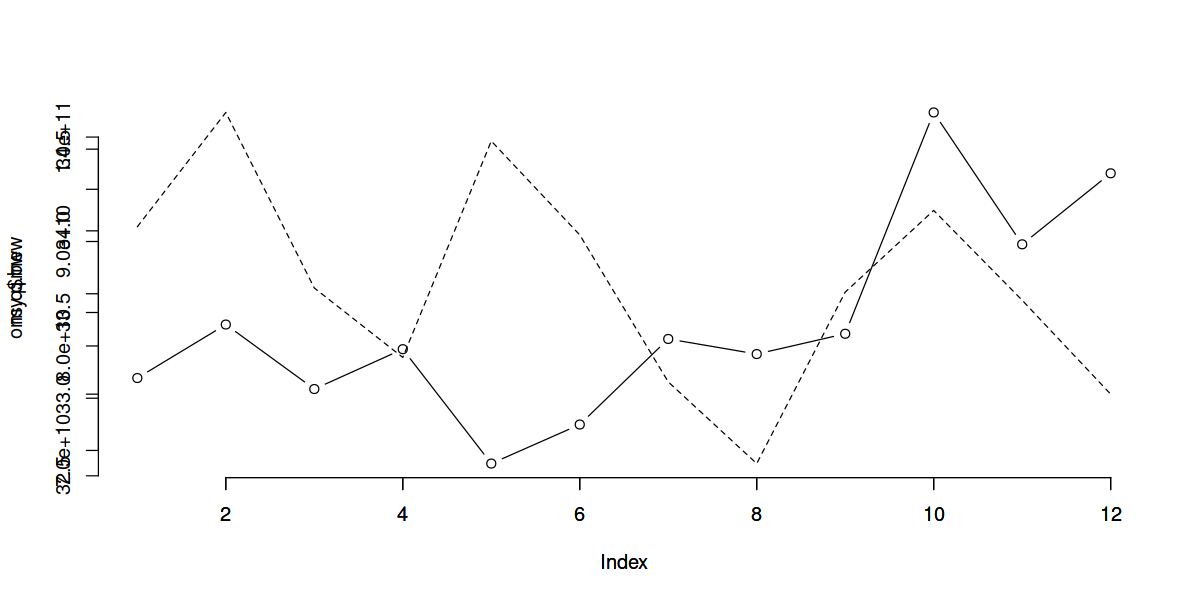

In [39]:
plot(my.q.bw, type="b", bty="n")
par(new=T)
plot(ons.q$mew, type="l", lty=2, bty="n")
#plot(c(tail(ons.q$mew, -1),  NA), type="l", lty=2, bty="n")

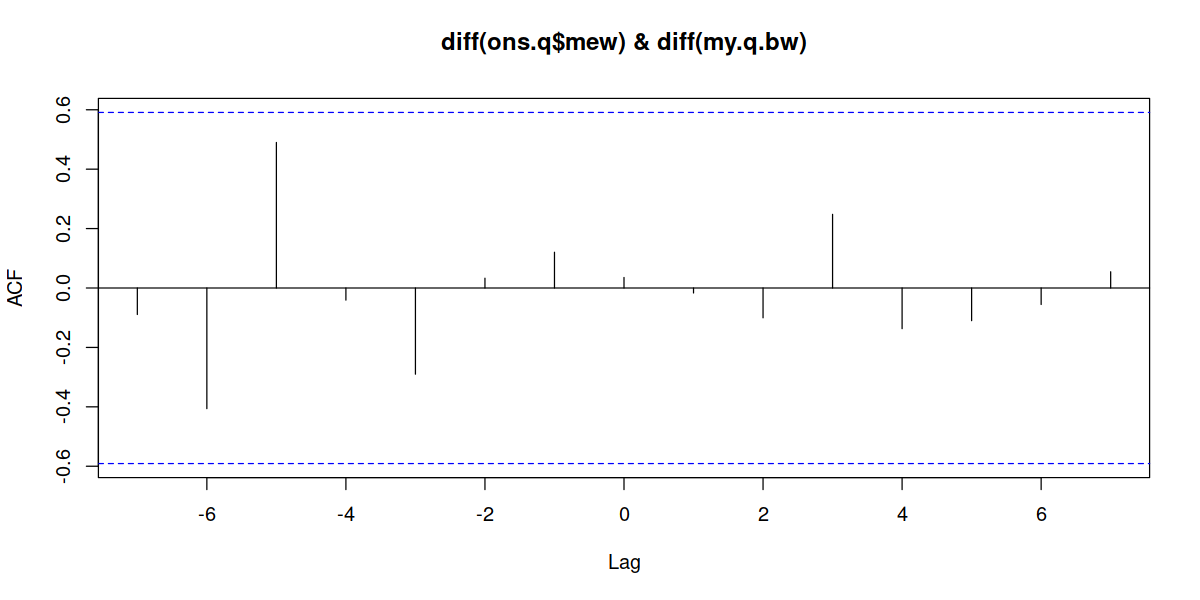

In [40]:
ccf(diff(ons.q$mew), diff(my.q.bw))

In [41]:
lfs.nsa.monthly <- read.csv("../../data/econ/lfs_nsa_rolling_months.csv", header=F)
lfs.nsa.monthly$month <- rep(1:12, 3)
lfs.nsa.monthly.99 <- read.csv("../../data/econ/lfs_nsa_rolling_months_since_1999.csv", header=F)
lfs.nsa.monthly.99$month <- rep(1:12, 20)

ERROR: Error in `$<-.data.frame`(`*tmp*`, month, value = c(1L, 2L, 3L, 4L, 5L, : replacement has 36 rows, data has 39


In [ ]:
plot(tapply(lfs.nsa.monthly.99$V1, lfs.nsa.monthly.99$month, mean), type="l")

In [ ]:
my <- 5 * as.vector(with(work.day.length, tapply(length, list(month, year), mean, na.rm=T))) / 60
lfs <- lfs.nsa.monthly$V1

In [ ]:
#plot(my.sa, type="b", lty=1, bty="n")
plot(my, type="b", bty="n")
par(new=T)
plot(lfs, type="l", lty=2, bty="n")

In [ ]:
ccf(diff(my), diff(lfs))

In [ ]:
cor.test(diff(my), diff(lfs))